## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [37]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import seaborn as sns # 另一個繪圖-樣式套件
import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [28]:
app_train["YEARS_BIRTH"] = app_train['DAYS_BIRTH'] / 365
print(pd.cut(app_train['YEARS_BIRTH'], bins = 10).value_counts().sort_index())
print(pd.cut(app_train['YEARS_BIRTH'], bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]).value_counts().sort_index())
print(pd.qcut(app_train['YEARS_BIRTH'], 10).value_counts().sort_index())

(20.469, 25.378]    13679
(25.378, 30.238]    33127
(30.238, 35.099]    38430
(35.099, 39.959]    41758
(39.959, 44.819]    40350
(44.819, 49.679]    34311
(49.679, 54.54]     33544
(54.54, 59.4]       32650
(59.4, 64.26]       27685
(64.26, 69.121]     11977
Name: YEARS_BIRTH, dtype: int64
(20, 25]    12159
(25, 30]    32862
(30, 35]    39440
(35, 40]    42868
(40, 45]    41406
(45, 50]    35135
(50, 55]    34942
(55, 60]    33120
(60, 65]    27476
(65, 70]     8103
Name: YEARS_BIRTH, dtype: int64
(20.517, 28.175]    30752
(28.175, 32.038]    30760
(32.038, 36.0]      30745
(36.0, 39.496]      30759
(39.496, 43.151]    30745
(43.151, 47.178]    30764
(47.178, 51.74]     30733
(51.74, 56.093]     30758
(56.093, 60.77]     30757
(60.77, 69.121]     30738
Name: YEARS_BIRTH, dtype: int64


In [29]:
app_test["YEARS_BIRTH"] = app_train['DAYS_BIRTH'] / 365
print(pd.cut(app_test['YEARS_BIRTH'], bins = 10).value_counts().sort_index())
print(pd.cut(app_test['YEARS_BIRTH'], bins = [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]).value_counts().sort_index())
print(pd.qcut(app_test['YEARS_BIRTH'], 10).value_counts().sort_index())

(20.993, 25.836]    2516
(25.836, 30.631]    5399
(30.631, 35.426]    6102
(35.426, 40.221]    6503
(40.221, 45.016]    6308
(45.016, 49.812]    5367
(49.812, 54.607]    5305
(54.607, 59.402]    4983
(59.402, 64.197]    4311
(64.197, 68.992]    1950
Name: YEARS_BIRTH, dtype: int64
(20, 25]    1949
(25, 30]    5171
(30, 35]    6388
(35, 40]    6713
(40, 45]    6592
(45, 50]    5592
(50, 55]    5590
(55, 60]    5133
(60, 65]    4313
(65, 70]    1303
Name: YEARS_BIRTH, dtype: int64
(21.04, 28.192]     4876
(28.192, 31.997]    4875
(31.997, 35.899]    4874
(35.899, 39.449]    4876
(39.449, 43.084]    4871
(43.084, 47.107]    4875
(47.107, 51.66]     4876
(51.66, 55.975]     4876
(55.975, 60.764]    4875
(60.764, 68.992]    4870
Name: YEARS_BIRTH, dtype: int64


(42799.5, 485100.0]       27524
(485100.0, 925200.0]      15940
(925200.0, 1365300.0]      3455
(1365300.0, 1805400.0]     1304
(1805400.0, 2245500.0]      521
Name: AMT_CREDIT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


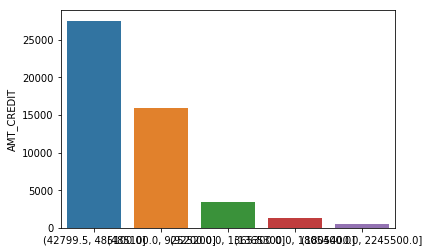

In [42]:
A = pd.cut(app_test['AMT_CREDIT'], bins = 5).value_counts().sort_index()
print(A)
px = A.index
py = A
print(sns.barplot(px, py))


(44999.999, 225000.0]    9885
(225000.0, 354469.5]     9620
(354469.5, 509400.0]     9828
(509400.0, 746280.0]     9947
(746280.0, 2245500.0]    9464
Name: AMT_CREDIT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


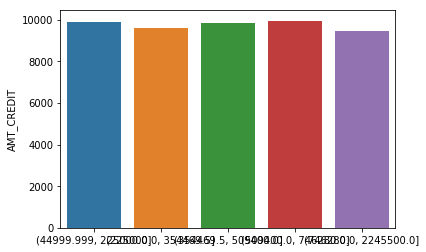

In [43]:
A = pd.qcut(app_test['AMT_CREDIT'], 5).value_counts().sort_index()
print(A)
px = A.index
py = A
print(sns.barplot(px, py))